In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from freegsnke import build_machine
from freegsnke.jtor_update import ConstrainPaxisIp
from freegsnke import equilibrium_update
from freegsnke import GSstaticsolver
from copy import deepcopy
from freegsnke.jtor_update import Fiesta_Topeol
from freegsnke.jtor_update import ConstrainBetapIp
from freegsnke.jtor_update import Lao85
from freegs4e.gradshafranov import mu0

In [2]:
tokamak = build_machine.tokamak(
    active_coils_path=f"C:/Users/LENOVO/Desktop/Datos tesis/freegsnke/machine_configs/MAST-U/MAST-U_like_active_coils.pickle",
    passive_coils_path=f"C:/Users/LENOVO/Desktop/Datos tesis/freegsnke/machine_configs/MAST-U/MAST-U_like_passive_coils.pickle",
    limiter_path=f"C:/Users/LENOVO/Desktop/Datos tesis/freegsnke/machine_configs/MAST-U/MAST-U_like_limiter.pickle",
    wall_path=f"C:/Users/LENOVO/Desktop/Datos tesis/freegsnke/machine_configs/MAST-U/MAST-U_like_wall.pickle",
)

Active coils --> built from pickle file.
Passive structures --> built from pickle file.
Limiter --> built from pickle file.
Wall --> built from pickle file.
Magnetic probes --> none provided.
Resistance (R) and inductance (M) matrices --> built using actives (and passives if present).
Tokamak built.


In [3]:
eq = equilibrium_update.Equilibrium(
    tokamak=tokamak,      # provide tokamak object
    Rmin=0.1, Rmax=2.0,   # radial range
    Zmin=-2.2, Zmax=2.2,  # vertical range
    nx=65,                # number of grid points in the radial direction (needs to be of the form (2**n + 1) with n being an integer)
    ny=129,               # number of grid points in the vertical direction (needs to be of the form (2**n + 1) with n being an integer)
    # psi=plasma_psi
)
profiles = ConstrainPaxisIp(
    eq=eq,        # equilibrium object
    paxis=8e3,    # profile object
    Ip=6e5,       # plasma current
    fvac=0.5,     # fvac = rB_{tor}
    alpha_m=1.8,  # profile function parameter
    alpha_n=1.2   # profile function parameter
)

In [4]:
GSStaticSolver = GSstaticsolver.NKGSsolver(eq)

In [24]:
with open('simple_diverted_currents_PaxisIp.pk', 'rb') as f:
    currents_dict = pickle.load(f)
    
# assign currents to the eq object
for key in currents_dict.keys():
    eq.tokamak.set_coil_current(coil_label=key, current_value=currents_dict[key])
    
eq.tokamak.getCurrents()

{'Solenoid': 5000.0,
 'PX': 4613.049761958626,
 'D1': 6051.841804928801,
 'D2': 1894.9173317832135,
 'D3': 1663.7594766897298,
 'Dp': -397.8437425044009,
 'D5': 3586.7284054932893,
 'D6': -1083.6789526602354,
 'D7': -562.9300303560887,
 'P4': -4564.190198138347,
 'P5': -4048.662255491955,
 'P6': 0.0004911931468066169,
 'vessel_1': 0.0,
 'vessel_2': 0.0,
 'vessel_3': 0.0,
 'vessel_4': 0.0,
 'vessel_5': 0.0,
 'vessel_6': 0.0,
 'vessel_7': 0.0,
 'vessel_8': 0.0,
 'vessel_9': 0.0,
 'vessel_10': 0.0,
 'vessel_11': 0.0,
 'vessel_12': 0.0,
 'vessel_13': 0.0,
 'vessel_14': 0.0,
 'vessel_15': 0.0,
 'vessel_16': 0.0,
 'vessel_17': 0.0,
 'vessel_18': 0.0,
 'vessel_19': 0.0,
 'vessel_20': 0.0,
 'vessel_21': 0.0,
 'vessel_22': 0.0,
 'centrecolumn_1': 0.0,
 'centrecolumn_2': 0.0,
 'centrecolumn_3': 0.0,
 'centrecolumn_4': 0.0,
 'centrecolumn_5': 0.0,
 'centrecolumn_6': 0.0,
 'centrecolumn_7': 0.0,
 'centrecolumn_8': 0.0,
 'centrecolumn_9': 0.0,
 'centrecolumn_10': 0.0,
 'colosseum_upper_1': 0.0,
 'c

In [6]:
GSStaticSolver.solve(eq=eq, 
                     profiles=profiles, 
                     constrain=None, 
                     target_relative_tolerance=1e-9,
                     verbose=True, # print output
                     )

-----
Forward static solve starting...
Initial guess for plasma_psi successful, residual found.
Initial relative error = 9.65e-01
-----
Picard iteration: 0
Update too large, resized.
...relative error =  9.46e-01
-----
Picard iteration: 1
Update too large, resized.
...relative error =  9.23e-01
-----
Picard iteration: 2
Update too large, resized.
...relative error =  8.97e-01
-----
Picard iteration: 3
Update too large, resized.
...relative error =  8.67e-01
-----
Picard iteration: 4
Update too large, resized.
...relative error =  8.31e-01
-----
Picard iteration: 5
Update too large, resized.
...relative error =  7.90e-01
-----
Picard iteration: 6
Update too large, resized.
...relative error =  7.43e-01
-----
Picard iteration: 7
Update too large, resized.
...relative error =  6.92e-01
-----
Picard iteration: 8
Update too large, resized.
...relative error =  6.32e-01
-----
Picard iteration: 9
Update too large, resized.
...relative error =  5.60e-01
-----
Picard iteration: 10
Update too la

Forward static solve SUCCESS. Tolerance 1.65e-10 (vs. requested 1.00e-09) reached in 0/100 iterations.


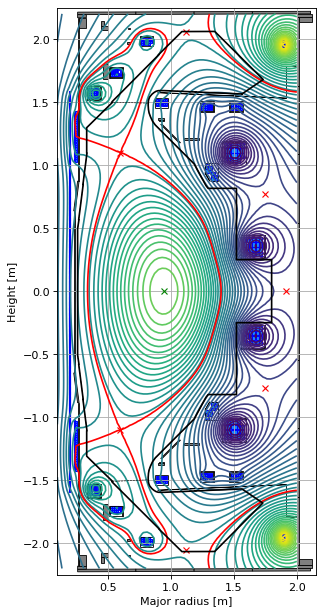

In [12]:
# instatiate new equilibrium object
eq_ConstrainPaxisIp = deepcopy(eq)

# call solver with new profile object
GSStaticSolver.solve(eq=eq, 
                     profiles=profiles,  
                     target_relative_tolerance=1e-9)


# plot the resulting equilbria 
fig1, ax1 = plt.subplots(1, 1, figsize=(4, 8), dpi=80)
ax1.grid(True, which='both')
eq_beta.plot(axis=ax1, show=False)
eq_beta.tokamak.plot(axis=ax1, show=False)
ax1.set_xlim(0.1, 2.15)
ax1.set_ylim(-2.25, 2.25)
plt.tight_layout()

# Alternative solver

### El siguiente caso sólo aplica para solucionadores que incluyen \beta_{0} de la densidad de corriente como parámetro necesario para obtener una solución. (Tal es el caso del perfil de Lao85 y Topeol)

Forward static solve SUCCESS. Tolerance 6.36e-10 (vs. requested 1.00e-09) reached in 10/100 iterations.


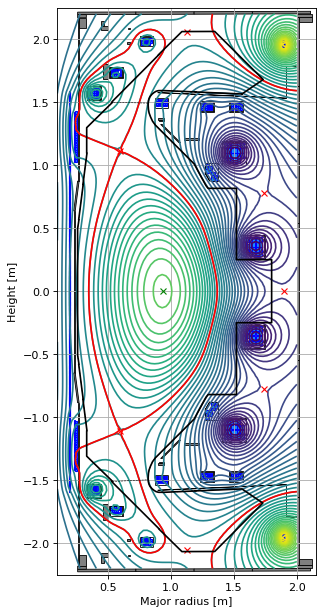

In [15]:
profiles_topeol = Fiesta_Topeol(
    eq=eq,        # equilibrium object
    Beta0=0.3665, # beta0 parameter
    Ip=6e5,       # plasma current
    fvac=0.5,     # fvac = rB_{tor}
    alpha_m=2,    # profile function parameter
    alpha_n=1     # profile function parameter
)
# instatiate new equilibrium object
eq_topeol = deepcopy(eq)

# call solver with new profile object
GSStaticSolver.solve(eq=eq_topeol, 
                     profiles=profiles_topeol, 
                     constrain=None, 
                     target_relative_tolerance=1e-9)


# plot the resulting equilbria 
fig1, ax1 = plt.subplots(1, 1, figsize=(4, 8), dpi=80)
ax1.grid(True, which='both')
eq_topeol.plot(axis=ax1, show=False)
eq_topeol.tokamak.plot(axis=ax1, show=False)
ax1.set_xlim(0.1, 2.15)
ax1.set_ylim(-2.25, 2.25)
plt.tight_layout()

In [16]:
alpha = np.array([1,0,-1])
beta = (1 - profiles_topeol.Beta0)/profiles_topeol.Beta0 * alpha * mu0

profiles_lao = Lao85(
    eq=eq,
    Ip=6e5,
    fvac=0.5,
    alpha=alpha,
    beta=beta,
    alpha_logic=False,
    beta_logic=False,
    Ip_logic=True,
)

Forward static solve SUCCESS. Tolerance 6.35e-10 (vs. requested 1.00e-09) reached in 10/100 iterations.


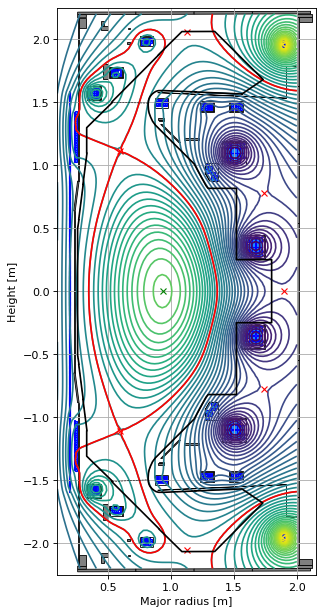

In [17]:
# instatiate new equilibrium object
eq_lao = deepcopy(eq)

# call solver with new profile object
GSStaticSolver.solve(eq=eq_lao, 
                     profiles=profiles_lao, 
                     constrain=None, 
                     target_relative_tolerance=1e-9)


# plot the resulting equilbria 
fig1, ax1 = plt.subplots(1, 1, figsize=(4, 8), dpi=80)
ax1.grid(True, which='both')
eq_lao.plot(axis=ax1, show=False)
eq_lao.tokamak.plot(axis=ax1, show=False)
ax1.set_xlim(0.1, 2.15)
ax1.set_ylim(-2.25, 2.25)
plt.tight_layout()

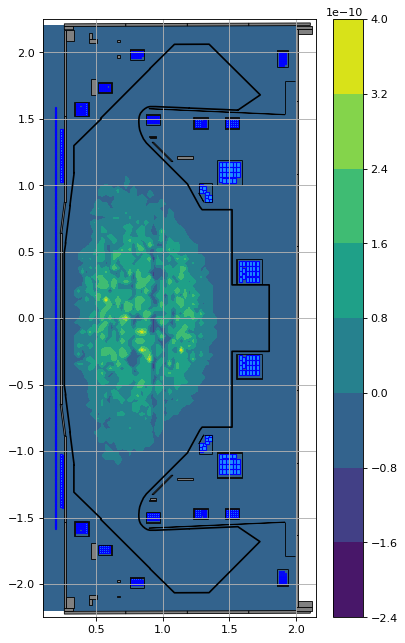

In [18]:
laoj = profiles_lao.Jtor(R=eq.R, Z=eq.Z, psi=eq.psi())
topj = profiles_topeol.Jtor(R=eq.R, Z=eq.Z, psi=eq.psi())


fig1, ax1 = plt.subplots(1, 1, figsize=(5, 8), dpi=80)
ax1.grid(True, which='both')
plt.contourf(eq.R, eq.Z, (laoj-topj))
eq.tokamak.plot(axis=ax1, show=False)
plt.plot(eq.tokamak.wall.R, eq.tokamak.wall.Z, 'k', 1.2)
ax1.set_xlim(0.1, 2.15)
ax1.set_ylim(-2.25, 2.25)
plt.tight_layout()
plt.colorbar()

In [19]:
alpha, beta = profiles_topeol.Lao_parameters(n_alpha=2, n_beta=2, alpha_logic=True, beta_logic=True)
print(f"Original alpha's = {profiles_lao.alpha[0:2]} vs. Fitted from Topeol = {alpha}.")
print(f"Original beta's = {profiles_lao.beta[0:2]} vs. Fitted from Topeol = {beta}.")

Original alpha's = [1 0] vs. Fitted from Topeol = [ 1.0000000e+00 -1.1185497e-14].
Original beta's = [2.17211345e-06 0.00000000e+00] vs. Fitted from Topeol = [ 2.17211345e-06 -2.40550154e-20].


In [20]:
profiles_lao_fit = Lao85(
    eq=eq,
    Ip=6e5,
    fvac=0.5,
    alpha=alpha,
    beta=beta,
    alpha_logic=True,
    beta_logic=True,
)

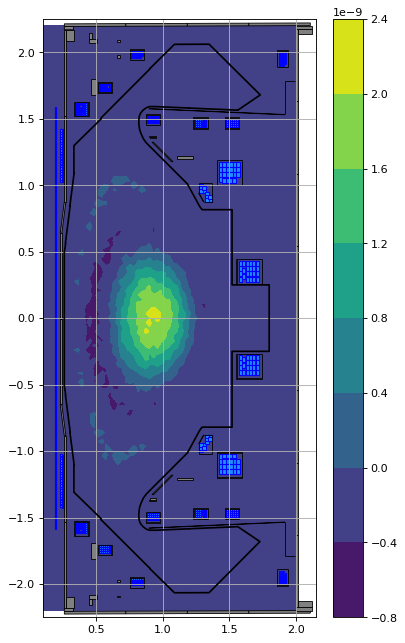

In [21]:
laoj = profiles_lao_fit.Jtor(R=eq.R, Z=eq.Z, psi=eq.psi())
topj = profiles_topeol.Jtor(R=eq.R, Z=eq.Z, psi=eq.psi())


fig1, ax1 = plt.subplots(1, 1, figsize=(5, 8), dpi=80)
ax1.grid(True, which='both')
plt.contourf(eq.R, eq.Z, (laoj-topj))
eq.tokamak.plot(axis=ax1, show=False)
plt.plot(eq.tokamak.wall.R, eq.tokamak.wall.Z, 'k', 1.2)
ax1.set_xlim(0.1, 2.15)
ax1.set_ylim(-2.25, 2.25)
plt.tight_layout()
plt.colorbar()

In [22]:
alpha_m, alpha_n, beta_0 = profiles_lao_fit.Topeol_parameters()

print(f"Original alpha_m = {profiles_topeol.alpha_m} vs. Fitted from Lao85 = {alpha_m}.")
print(f"Original alpha_n = {profiles_topeol.alpha_n} vs. Fitted from Lao85 = {alpha_n}.")
print(f"Original beta_0 = {profiles_topeol.Beta0} vs. Fitted from Lao85 = {beta_0}.")

Original alpha_m = 2 vs. Fitted from Lao85 = 2.0000000837960537.
Original alpha_n = 1 vs. Fitted from Lao85 = 1.000000024480738.
Original beta_0 = 0.3665 vs. Fitted from Lao85 = 0.3664999995587856.


# Forward solve

In [23]:
# initialise the equilibrium
eq_limiter = deepcopy(eq)


# initialise the profiles
profiles = ConstrainPaxisIp(
    eq=eq_limiter,        # equilibrium object
    paxis=6e3,    # profile object
    Ip=4e5,       # plasma current
    fvac=0.5,     # fvac = rB_{tor}
    alpha_m=1.8,  # profile function parameter
    alpha_n=1.2   # profile function parameter
)

# load the nonlinear solver
from freegsnke import GSstaticsolver
GSStaticSolver = GSstaticsolver.NKGSsolver(eq_limiter)    

# set the coil currents
import pickle
with open('simple_limited_currents_PaxisIp.pk', 'rb') as f:
    current_values = pickle.load(f)

for key in current_values.keys():
    eq_limiter.tokamak.set_coil_current(coil_label=key, current_value=current_values[key])

# carry out the foward solve to find the equilibrium
GSStaticSolver.solve(eq=eq_limiter, 
                     profiles=profiles, 
                     constrain=None, 
                     target_relative_tolerance=1e-9)


# plot the resulting equilbria 
fig1, ax1 = plt.subplots(1, 1, figsize=(4, 8), dpi=80)
ax1.grid(True, which='both')
eq_limiter.plot(axis=ax1, show=False)
eq_limiter.tokamak.plot(axis=ax1, show=False)
ax1.set_xlim(0.1, 2.15)
ax1.set_ylim(-2.25, 2.25)
plt.tight_layout()

FileNotFoundError: [Errno 2] No such file or directory: 'simple_limited_currents_PaxisIp.pk'